<>:23: SyntaxWarning: invalid escape sequence '\$'
<>:23: SyntaxWarning: invalid escape sequence '\$'
C:\Users\evmig\AppData\Local\Temp\ipykernel_2800\829894885.py:23: SyntaxWarning: invalid escape sequence '\$'
  GameStop["Revenue"] = GameStop["Revenue"].str.replace(',|\$', "", regex=True)


  Revenue  Date
0    6466  2020
1    8285  2019
2    8547  2018
3    7965  2017
4    9364  2016


C:\Users\evmig\AppData\Local\Temp\ipykernel_2800\829894885.py:44: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\evmig\AppData\Local\Temp\ipykernel_2800\829894885.py:53: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



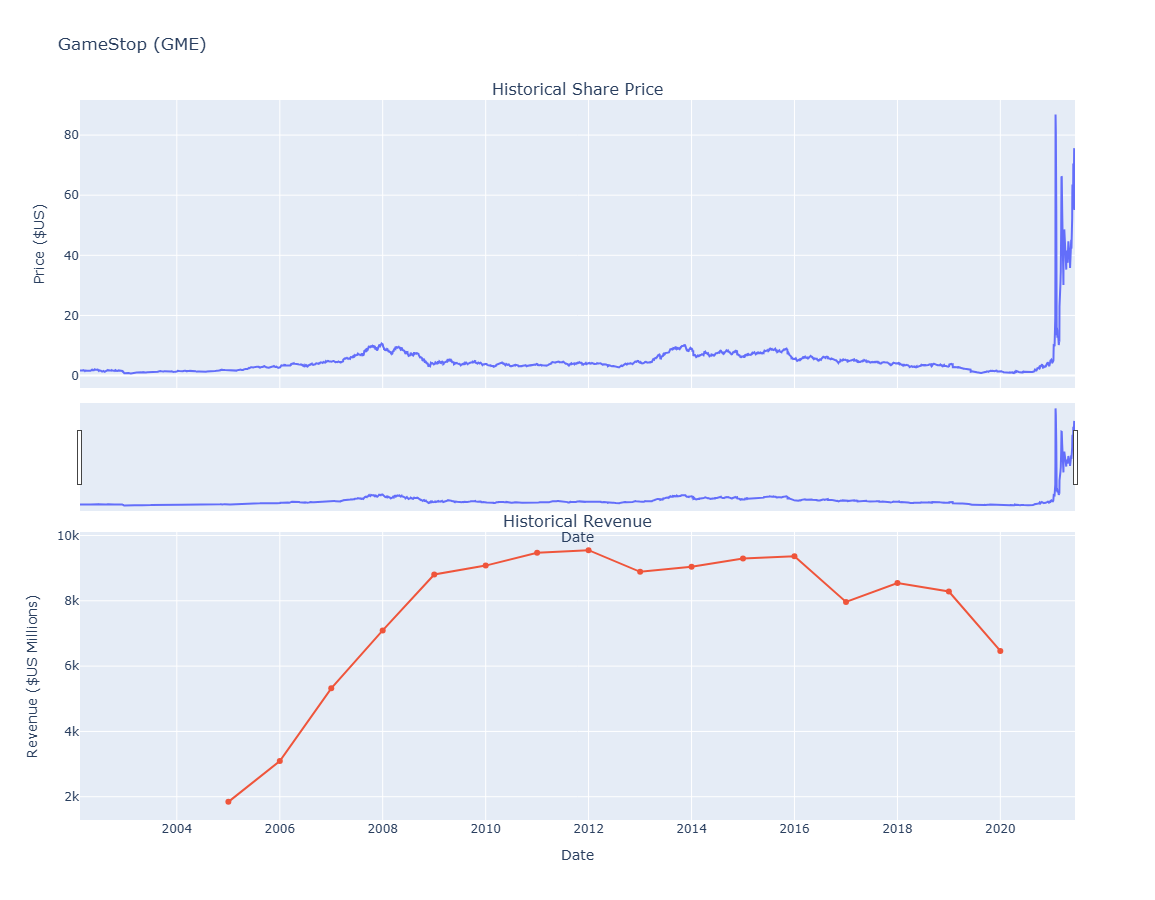

In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import yfinance as yf

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")
df = pd.DataFrame()
table = soup.find("table")
rows = []
for row in table.find("tbody").find_all("tr"):
    cols = row.find_all("td")
    rows.append({
        "Revenue": cols[1].text.strip(),
        "Date": cols[0].text.strip()
    })

GameStop = pd.DataFrame(rows)
GameStop["Revenue"] = GameStop["Revenue"].str.replace(',|\$', "", regex=True)
GameStop.dropna(inplace=True)
GameStop = GameStop[GameStop["Revenue"] != ""]
print(GameStop.head())

gme_data = yf.Ticker("GME").history(period="max")
gme_data.reset_index(inplace=True)
gme_data = gme_data[["Date", "Close"]]

def make_graph(stock_data, revenue_data, stock):
    stock_data_specific = stock_data[stock_data["Date"] <= "2021-06-14"]
    revenue_data_specific = revenue_data[revenue_data["Date"] <= "2021-04-30"]

    fig = make_subplots(
        rows=2, cols=1, shared_xaxes=True,
        subplot_titles=("Historical Share Price", "Historical Revenue"),
        vertical_spacing=0.2
    )

    fig.add_trace(
        go.Scatter(
            x=pd.to_datetime(stock_data_specific["Date"], infer_datetime_format=True),
            y=stock_data_specific["Close"].astype(float),
            name="Share Price"
        ),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(
            x=pd.to_datetime(revenue_data_specific["Date"], infer_datetime_format=True),
            y=revenue_data_specific["Revenue"].astype(float),
            name="Revenue"
        ),
        row=2, col=1
    )

    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)

    fig.update_layout(
        showlegend=False,
        height=900,
        title=stock,
        xaxis_rangeslider_visible=True
    )

    fig.show()

make_graph(gme_data, GameStop, "GameStop (GME)")